In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar visualizações
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Carregar apenas 9500 linhas
df = pd.read_excel('data\Online Retail.xlsx', nrows=9500)

print("=== ANÁLISE ONLINE RETAIL ===")
print(f"Dataset shape: {df.shape}")
print("\nPrimeiras linhas:")
print(df.head())

<>:11: SyntaxWarning: invalid escape sequence '\O'
<>:11: SyntaxWarning: invalid escape sequence '\O'
C:\Users\DevBook\AppData\Local\Temp\ipykernel_6684\3626764909.py:11: SyntaxWarning: invalid escape sequence '\O'
  df = pd.read_excel('data\Online Retail.xlsx', nrows=9500)


=== ANÁLISE ONLINE RETAIL ===
Dataset shape: (9500, 9)

Primeiras linhas:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSum  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     20.34  


In [2]:
#Análise Exploratória Inicial

def analise_online_retail(df):
    print("=== INFORMAÇÕES GERAIS ===")
    print(df.info())
    
    print("\n=== ESTATÍSTICAS DESCRITIVAS ===")
    print(df.describe())
    
    print("\n=== VALORES NULOS ===")
    print(df.isnull().sum())
    
    # Verificar dados únicos
    print(f"\n=== DADOS ÚNICOS ===")
    print(f"Clientes únicos: {df['CustomerID'].nunique()}")
    print(f"Produtos únicos: {df['StockCode'].nunique()}")
    print(f"Países únicos: {df['Country'].nunique()}")

analise_online_retail(df)

=== INFORMAÇÕES GERAIS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    9500 non-null   object        
 1   StockCode    9500 non-null   object        
 2   Description  9458 non-null   object        
 3   Quantity     9500 non-null   int64         
 4   InvoiceDate  9500 non-null   datetime64[ns]
 5   UnitPrice    9500 non-null   float64       
 6   CustomerID   7210 non-null   float64       
 7   Country      9500 non-null   object        
 8   TotalSum     9500 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 668.1+ KB
None

=== ESTATÍSTICAS DESCRITIVAS ===
          Quantity                    InvoiceDate    UnitPrice    CustomerID  \
count  9500.000000                           9500  9500.000000   7210.000000   
mean      7.773053  2010-12-03 02:56:28.136842

In [3]:
# Limpeza básica - Análise de Qualidade dos Dados
df_clean = df.copy()

# Remover linhas com CustomerID nulo (importante para análise de clientes)
print(f"Linhas antes da limpeza: {len(df_clean)}")
df_clean = df_clean.dropna(subset=['CustomerID'])
print(f"Linhas após remover CustomerID nulo: {len(df_clean)}")

# Converter CustomerID para inteiro
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

Linhas antes da limpeza: 9500
Linhas após remover CustomerID nulo: 7210


In [4]:
def analise_vendas(df):
    print("=== ANÁLISE DE VENDAS ===")
    
    # Calcular valor total por linha
    df['TotalValue'] = df['Quantity'] * df['UnitPrice']
    
    # Métricas principais
    total_vendas = df['TotalValue'].sum()
    ticket_medio = df['TotalValue'].mean()
    
    print(f"Total de vendas: €{total_vendas:,.2f}")
    print(f"Ticket médio: €{ticket_medio:,.2f}")
    print(f"Total de transações: {df['InvoiceNo'].nunique()}")
    
    # Top produtos
    top_produtos = df.groupby('StockCode').agg({
        'TotalValue': 'sum',
        'Quantity': 'sum',
        'Description': 'first'
    }).sort_values('TotalValue', ascending=False).head(10)
    
    print("\n=== TOP 10 PRODUTOS POR FATURAMENTO ===")
    print(top_produtos[['Description', 'TotalValue', 'Quantity']])
    
    return df

df = analise_vendas(df)

=== ANÁLISE DE VENDAS ===
Total de vendas: €173,948.56
Ticket médio: €18.31
Total de transações: 492

=== TOP 10 PRODUTOS POR FATURAMENTO ===
                                   Description  TotalValue  Quantity
StockCode                                                           
22423                 REGENCY CAKESTAND 3 TIER     7679.70       619
84029E          RED WOOLLY HOTTIE WHITE HEART.     3167.88       824
DOT                             DOTCOM POSTAGE     2938.74         6
79321                            CHILLI LIGHTS     2749.78       602
85123A      WHITE HANGING HEART T-LIGHT HOLDER     2519.38       942
22086          PAPER CHAIN KIT 50'S CHRISTMAS      2403.92       676
21137                 BLACK RECORD COVER FRAME     2159.79       637
22752             SET 7 BABUSHKA NESTING BOXES     2005.96       255
21915                   RED  HARMONICA IN BOX      1817.82      1660
84347      ROTATING SILVER ANGELS T-LIGHT HLDR     1540.55     -8666


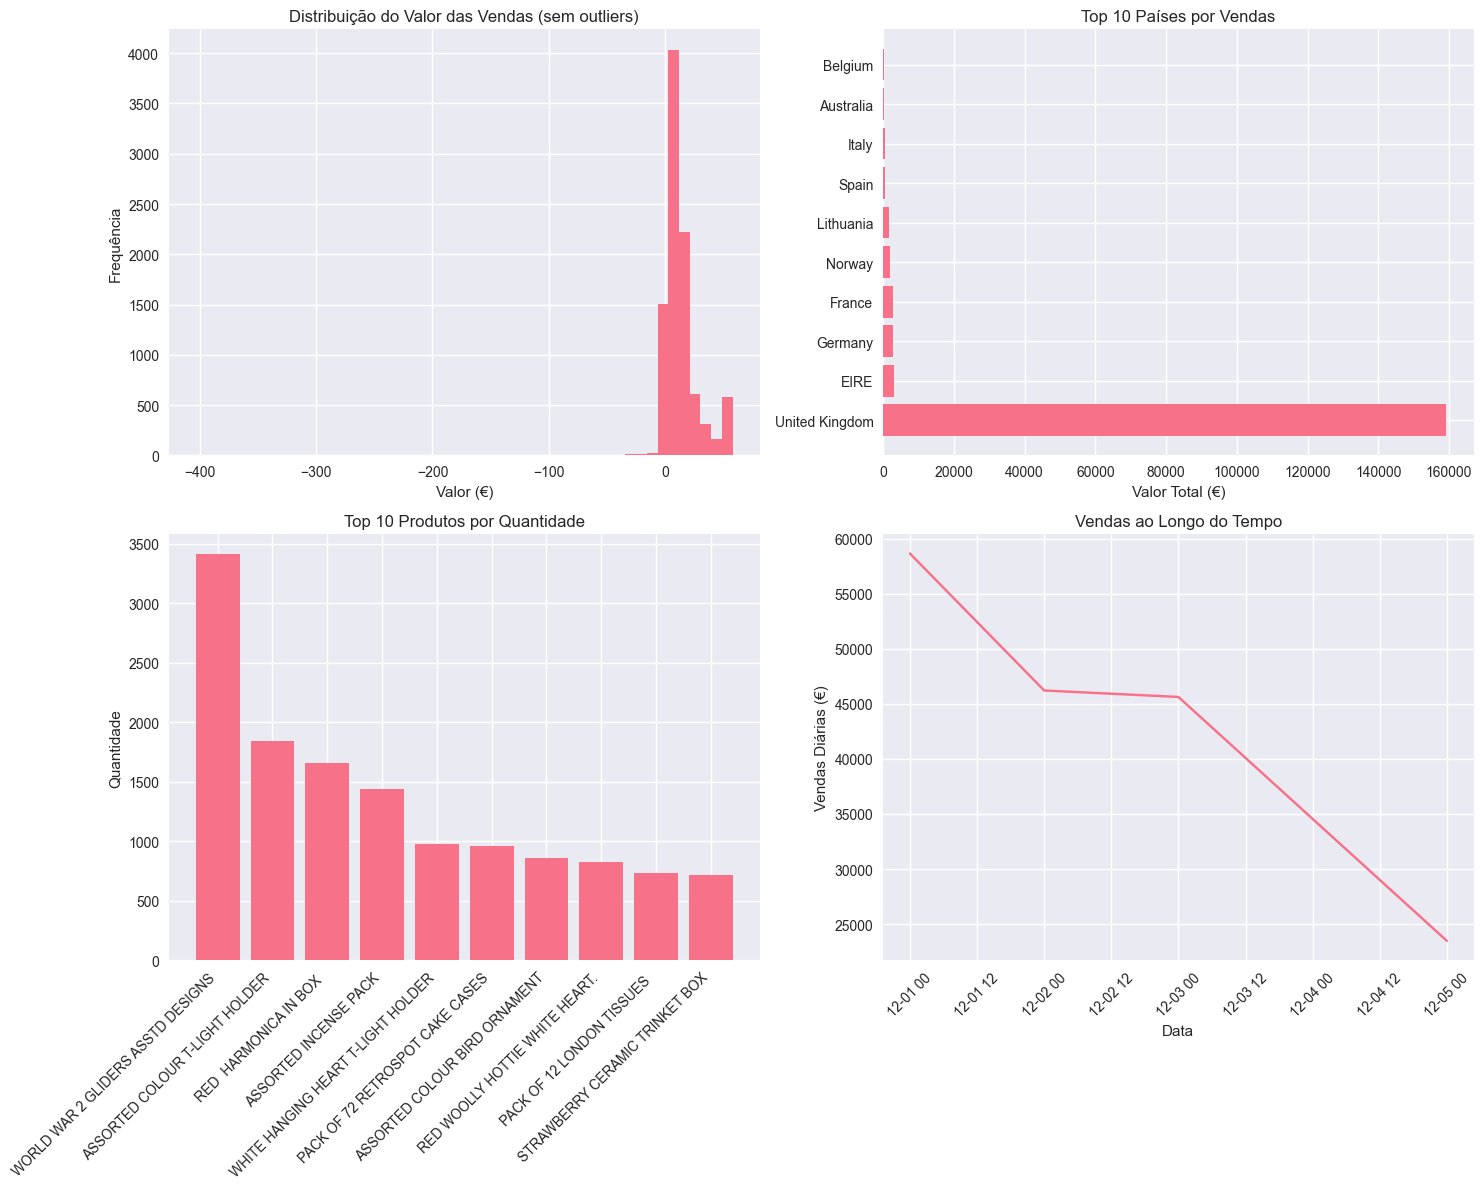

In [5]:
def criar_visualizacoes(df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Distribuição de valores de venda
    axes[0,0].hist(df['TotalValue'].clip(upper=df['TotalValue'].quantile(0.95)), bins=50)
    axes[0,0].set_title('Distribuição do Valor das Vendas (sem outliers)')
    axes[0,0].set_xlabel('Valor (€)')
    axes[0,0].set_ylabel('Frequência')
    
    # 2. Top países por vendas
    top_countries = df.groupby('Country')['TotalValue'].sum().sort_values(ascending=False).head(10)
    axes[0,1].barh(range(len(top_countries)), top_countries.values)
    axes[0,1].set_yticks(range(len(top_countries)))
    axes[0,1].set_yticklabels(top_countries.index)
    axes[0,1].set_title('Top 10 Países por Vendas')
    axes[0,1].set_xlabel('Valor Total (€)')
    
    # 3. Quantidade vendida por produto (top 10)
    top_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
    axes[1,0].bar(range(len(top_qty)), top_qty.values)
    axes[1,0].set_xticks(range(len(top_qty)))
    axes[1,0].set_xticklabels(top_qty.index, rotation=45, ha='right')
    axes[1,0].set_title('Top 10 Produtos por Quantidade')
    axes[1,0].set_ylabel('Quantidade')
    
    # 4. Distribuição temporal (se tiver data)
    if 'InvoiceDate' in df.columns:
        df['Date'] = df['InvoiceDate'].dt.date
        daily_sales = df.groupby('Date')['TotalValue'].sum()
        axes[1,1].plot(daily_sales.index, daily_sales.values)
        axes[1,1].set_title('Vendas ao Longo do Tempo')
        axes[1,1].set_xlabel('Data')
        axes[1,1].set_ylabel('Vendas Diárias (€)')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

criar_visualizacoes(df)

In [6]:
def analise_clientes(df):
    print("=== ANÁLISE DE CLIENTES ===")
    
    # Métricas por cliente
    client_metrics = df.groupby('CustomerID').agg({
        'TotalValue': ['sum', 'mean', 'count'],
        'Quantity': 'sum',
        'InvoiceNo': 'nunique'
    }).round(2)
    
    client_metrics.columns = ['Total_Gasto', 'Ticket_Medio', 'Itens_Comprados', 'Total_Quantidade', 'Transacoes']
    top_clientes = client_metrics.sort_values('Total_Gasto', ascending=False).head(10)
    
    print("TOP 10 CLIENTES POR FATURAMENTO:")
    print(top_clientes)
    
    return client_metrics

client_metrics = analise_clientes(df)

=== ANÁLISE DE CLIENTES ===
TOP 10 CLIENTES POR FATURAMENTO:
            Total_Gasto  Ticket_Medio  Itens_Comprados  Total_Quantidade  \
CustomerID                                                                 
15061.0         9407.34        128.87               73              5475   
13777.0         6585.16        199.55               33              3348   
17850.0         5391.21         18.15              297              1733   
16029.0         4271.52        355.96               12              1936   
16210.0         2474.74        176.77               14              1070   
13081.0         2366.78         31.98               74              1346   
14911.0         2283.53         24.55               93              1076   
16754.0         2002.40       1001.20                2              4280   
12433.0         1919.14         26.29               73              1852   
15299.0         1835.01        611.67                3              2097   

            Transacoes  
C

In [7]:
# Produtos mais vendidos juntos (simplificado)
def analise_associacao(df):
    from collections import Counter
    from itertools import combinations
    
    print("=== PRODUTOS VENDIDOS JUNTOS ===")
    
    # Agrupar produtos por invoice
    basket = df.groupby('InvoiceNo')['Description'].apply(list)
    
    # Contar pares de produtos (apenas para transações com poucos itens)
    pair_counter = Counter()
    
    for products in basket:
        if len(products) <= 5:  # Limitar para performance
            for pair in combinations(set(products), 2):
                pair_counter[pair] += 1
    
    # Top pares
    top_pairs = pair_counter.most_common(10)
    print("Top 10 pares de produtos vendidos juntos:")
    for pair, count in top_pairs:
        print(f"{pair[0][:30]}... + {pair[1][:30]}...: {count} vezes")

# analise_associacao(df)  # Pode ser pesado, use com cuidado

In [9]:
# Salvar resultados em Excel
with pd.ExcelWriter('Output/analise_online_retail_9500.xlsx') as writer:
    df.to_excel(writer, sheet_name='Dados_Originais', index=False)
    client_metrics.to_excel(writer, sheet_name='Analise_Clientes')
    
    # Top produtos
    top_produtos = df.groupby(['StockCode', 'Description']).agg({
        'TotalValue': 'sum',
        'Quantity': 'sum',
        'InvoiceNo': 'nunique'
    }).sort_values('TotalValue', ascending=False).head(20)
    top_produtos.to_excel(writer, sheet_name='Top_Produtos')

print("Análise salva em 'Output\analise_online_retail_9500.xlsx'")

Análise salva em 'Outputnalise_online_retail_9500.xlsx'


In [ ]:
#Análise de sazonalidade (se tiver datas)

#Segmentação de clientes (RFM)

#Detecção de outliers em quantidades e valores

#Análise de devoluções (quantidades negativas)